we're using the navier stokes equation here however without explicitly simulating pressure. turns out simulating pressure is especially difficult due to... reasons? i think we dont have an easy equation to calculate pressure like we do for other things and it's easier to calculate what pressure should be rather than what it is which is interesting.

so the general idea is using the navier stokes equation but instead of calculating pressure, solve the navier stokes equation ignoring pressure. the result of that equation tells us what our wind movement in x,y looks like. we can then use that info to solve the poisson equation. from my understanding the poisson equations finds us pressure values that would make sense in the context of weather. so for example if theres a lot of wind moving to the right it will assign the right a high pressure value and the surrounding areas lower pressure.

with these "solved for" pressure values, we actually update the x,y wind movement with the pressure values to get a realistic? simulation of wind

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
timestep = 1
cellSize = 1

viscosity = 10**-5
density = 1.2

In [3]:
def resetWind():
    xWindMovement = np.random.uniform(-1, 1, (5, 5))
    yWindMovement = np.random.uniform(-1, 1, (5, 5))

    return xWindMovement, yWindMovement

xWindMovement, yWindMovement = resetWind()

# xWindMovement = np.arange(1, 26).reshape(5, 5)
# yWindMovement = np.arange(1, 26).reshape(5, 5)

# xWindMovement = np.random.uniform(-0.1, 0.1, (5, 5))
# yWindMovement = np.random.uniform(-0.1, 0.1, (5, 5))

# x = np.linspace(-1, 1, 5)
# y = np.linspace(-1, 1, 5)
# X, Y = np.meshgrid(x, y)

# xWindMovement = -Y  # Creates a counterclockwise vortex
# yWindMovement = X

In [12]:
def calculateNeighbors(data):
    # easternNeighbor = np.hstack((data[:, 1:], np.zeros((5,1))))
    # westernNeighbor = np.hstack((np.zeros((5,1)), data[:, :-1]))
    # northernNeighbor = np.vstack((np.zeros(5), data[:-1]))
    # southernNeighbor = np.vstack((data[1:], np.zeros(5)))

    # easternNeighbor = np.hstack((data[:, 1:], -data[:, -1].reshape(5,1)))
    # westernNeighbor = np.hstack((-data[:, -1].reshape(5,1), data[:, :-1]))
    # northernNeighbor = np.vstack((-data[-1].reshape(1,5), data[:-1]))
    # southernNeighbor = np.vstack((data[1:], -data[1].reshape(1,5)))

    # wrap around
    # easternNeighbor = np.hstack((data[:, 1:], data[:, :1]))
    # westernNeighbor = np.hstack((data[:, -1:], data[:, :-1]))
    # northernNeighbor = np.vstack((data[-1:], data[:-1]))
    # southernNeighbor = np.vstack((data[1:], data[:1]))

    # use boundary velocities
    easternNeighbor = np.hstack((data[:, 1:], data[:, -1].reshape(-1,1)))
    westernNeighbor = np.hstack((data[:, 0].reshape(-1,1), data[:, :-1]))
    northernNeighbor = np.vstack((data[0].reshape(1,-1), data[:-1]))
    southernNeighbor = np.vstack((data[1:], data[-1].reshape(1,-1)))

    return (northernNeighbor, easternNeighbor, southernNeighbor, westernNeighbor)

def divergence(xVelocity, yVelocity):
    _,e,_,w = calculateNeighbors(xVelocity)
    n,_,s,_ = calculateNeighbors(yVelocity)
    return (e-w)/cellSize*2 + (n-s)/cellSize*2

In [5]:
# n,e,s,w = calculateNeighbors(xWindMovement)
# xAdvection = -1 * xWindMovement * (e - w)/(2*cellSize) - yWindMovement * (n - s)/(2*cellSize)
# xDiffusion = viscosity * ((e - 2*xWindMovement + w)/(cellSize**2) + (n - 2*xWindMovement + s)/(cellSize**2))
# xPredictedWind = xWindMovement + timestep * (xAdvection + xDiffusion)

# n,e,s,w = calculateNeighbors(yWindMovement)
# yAdvection = -1 * xWindMovement * (e - w)/(2*cellSize) - yWindMovement * (n - s)/(2*cellSize)
# yDiffusion = viscosity * ((e - 2*yWindMovement + w)/(cellSize**2) + (n - 2*yWindMovement + s)/(cellSize**2))
# yPredictedWind = yWindMovement + timestep * (yAdvection + yDiffusion)

In [6]:
# prevPressure = np.full((5,5), np.inf)
# pressure = np.zeros((5, 5))
# stabalizedThresold = 0.001
# numIters = 0
# while np.abs(pressure - prevPressure).max() > stabalizedThresold:
#     summedNeighborPressure = np.add.reduce(np.array(calculateNeighbors(pressure)))
#     cellDivergence = divergence(xPredictedWind, yPredictedWind)
#     currentPressure = (summedNeighborPressure - cellDivergence)/4

#     prevPressure = pressure
#     pressure = currentPressure
#     numIters += 1

# print(f'After {numIters} iterations...')
# print(pressure)

After 79 iterations...
[[ -51.81513362  -59.30903544  -46.88127949  -15.02611314   78.51319075]
 [-163.952224   -190.54109838 -171.19177932 -125.73785353   83.07819115]
 [-337.45371372 -423.7138497  -407.60950528 -373.81456776  -20.46370233]
 [-532.15035116 -729.2535408  -741.72136429 -781.45018929 -341.12000267]
 [-135.8947598  -465.43041302 -484.57432118 -633.14731738 -512.56664877]]


In [7]:
# n,e,s,w = calculateNeighbors(pressure)

# xPressureGradient = (e-w)/(2*cellSize)
# yPressureGradient = (n-s)/(2*cellSize)

# # we multiply by timestep to scale the pressure according to timestep - more timesteps passing = greater movement as a result
# # we divide by density to scale the pressure according to how difficult it is to move air. for a very dense substance, it takes greater force, greater pressure to move it compared to low density fluid which will move easily
# xWindMovement = xPredictedWind - timestep/density * xPressureGradient
# yWindMovement = yPredictedWind - timestep/density * yPressureGradient

In [9]:
def plotData(data1, data2, title1, title2, vmin=None, vmax=None):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create 1 row, 2 columns

    # Determine color scale limits if not provided
    if vmin is None or vmax is None:
        vmin = min(np.min(data1), np.min(data2))
        vmax = max(np.max(data1), np.max(data2))

    # Plot with consistent color scale
    im1 = axes[0].imshow(data1, cmap='viridis', vmin=vmin, vmax=vmax)
    axes[0].set_title(title1)
    fig.colorbar(im1, ax=axes[0])

    im2 = axes[1].imshow(data2, cmap='viridis', vmin=vmin, vmax=vmax)
    axes[1].set_title(title2)
    fig.colorbar(im2, ax=axes[1])

    plt.show()

In [10]:
def predictWind(xWind, yWind, calculateStr):
    mainWind = xWind if calculateStr == 'x' else yWind
    n, e, s, w = calculateNeighbors(mainWind)

    # Upwind Differencing (prevents unrealistic reversals)
    advection_x = np.where(xWind > 0, -xWind * (mainWind - w) / cellSize, -xWind * (e - mainWind) / cellSize)
    advection_y = np.where(yWind > 0, -yWind * (mainWind - s) / cellSize, -yWind * (n - mainWind) / cellSize)

    diffusion = viscosity * ((e - 2*mainWind + w)/(cellSize**2) + (n - 2*mainWind + s)/(cellSize**2))

    return mainWind + timestep * (advection_x + advection_y + diffusion)


def solvePressure(xWind, yWind):
    pressure = np.zeros((5, 5))
    max_iters = 500  # Increase iteration count
    tolerance = 1e-8  # Stricter stopping condition

    for _ in range(max_iters):
        prevPressure = pressure.copy()
        cellDivergence = divergence(xWind, yWind)

        # Gauss-Seidel Iteration (directly modifies pressure)
        n, e, s, w = calculateNeighbors(pressure)
        pressure = 0.25 * (e + w + n + s - cellDivergence)

        if np.linalg.norm(pressure - prevPressure) < tolerance:
            break

    return pressure


def updateWind(wind, pressure, windStr):
    n,e,s,w = calculateNeighbors(pressure)

    if windStr == 'x':
        pressureGradient = (e-w)/(2*cellSize)
    else:
        pressureGradient = (n-s)/(2*cellSize)

    return wind - (timestep/density) * pressureGradient

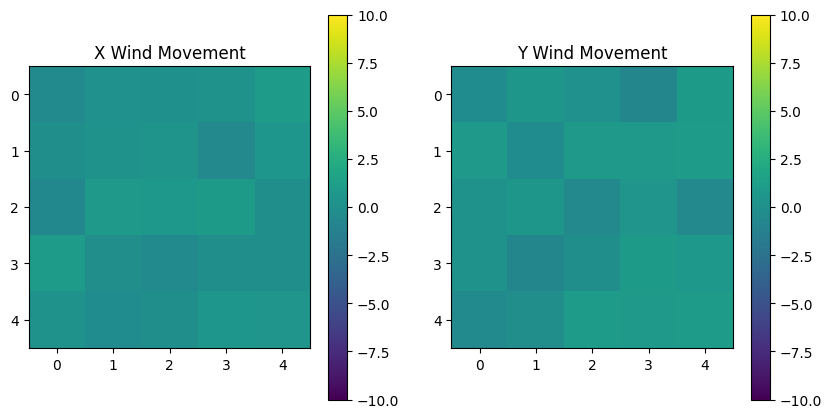

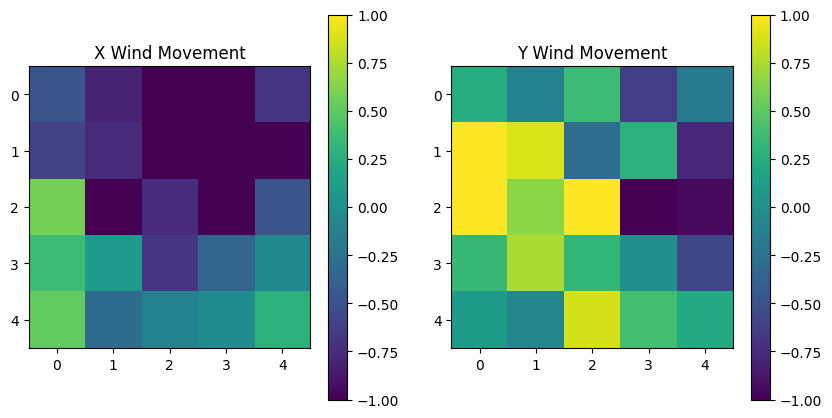

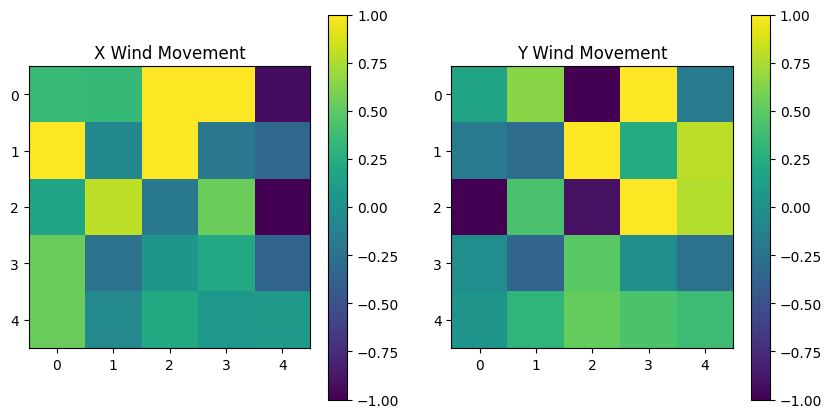

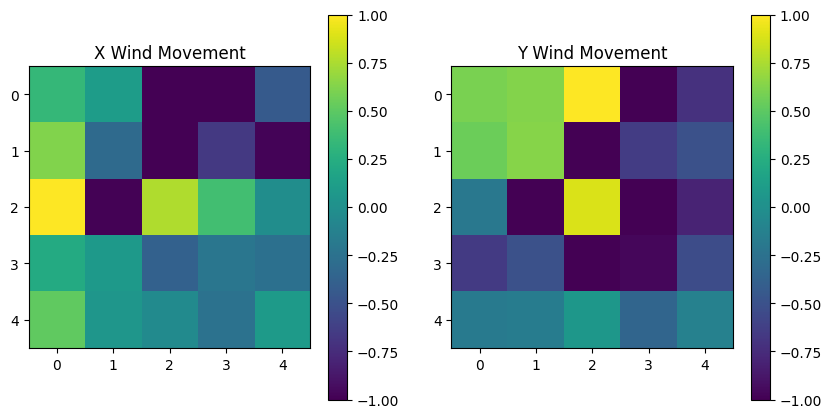

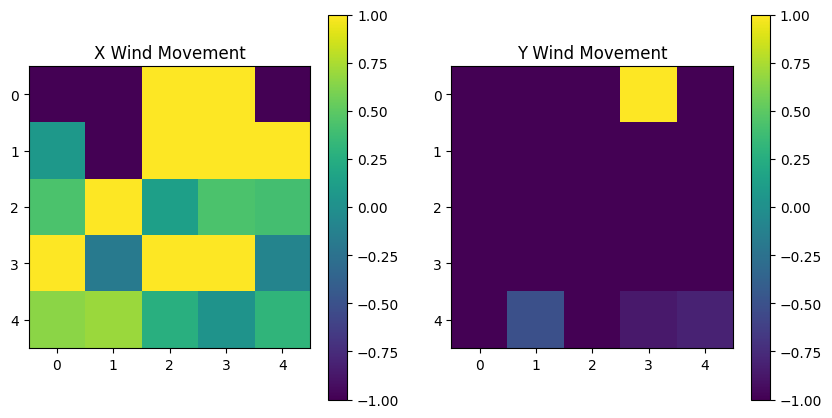

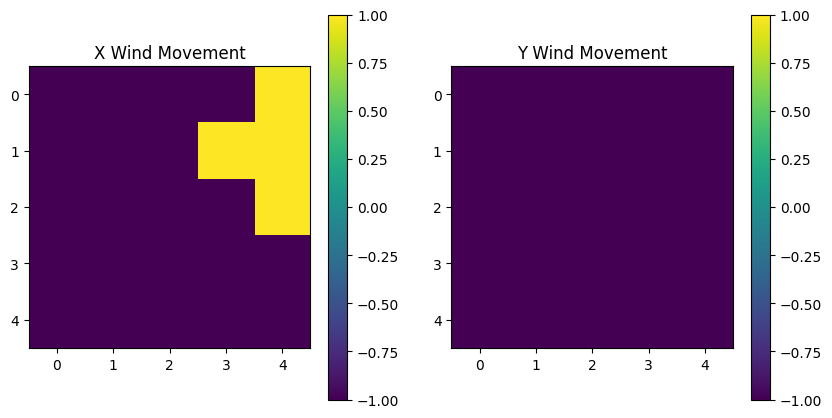

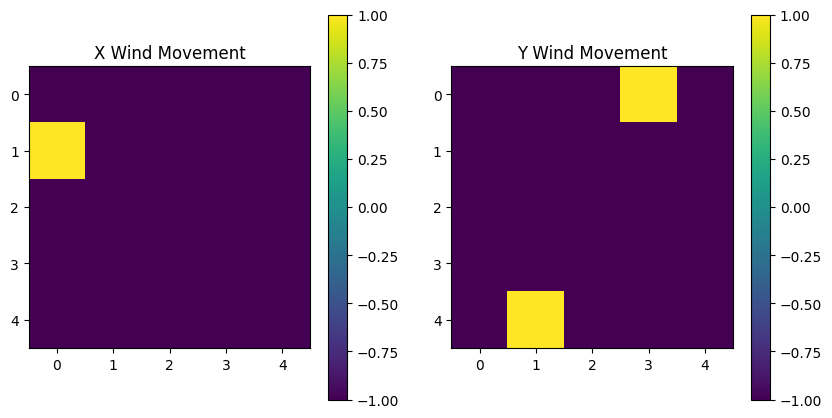

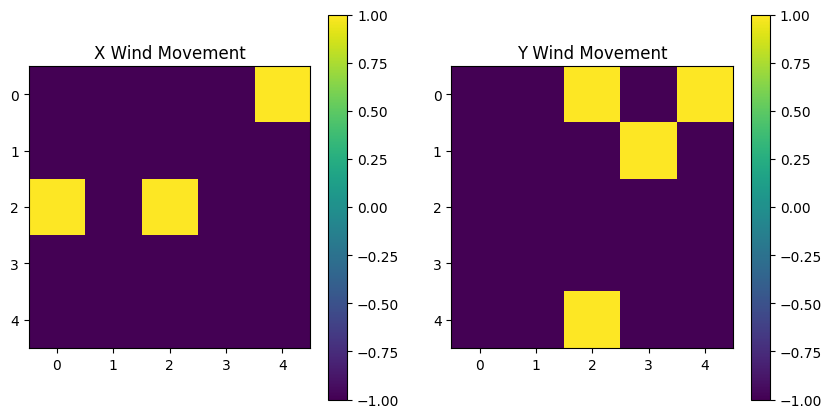

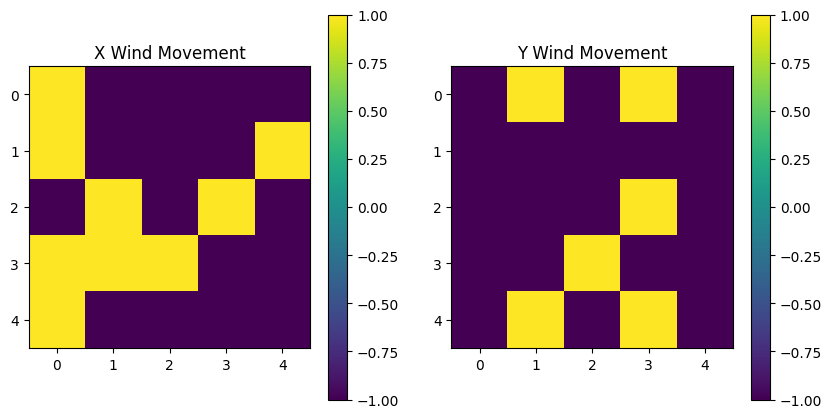

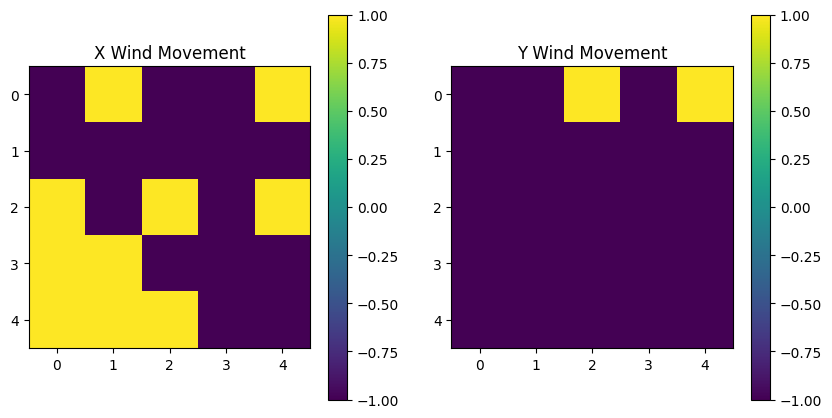

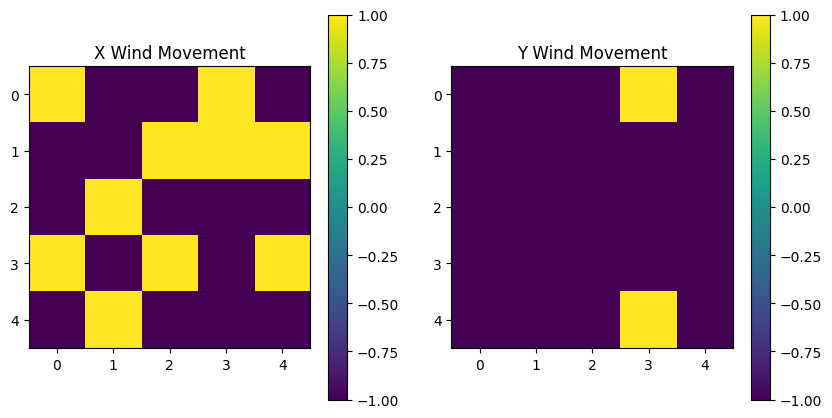

In [13]:
xWindMovement, yWindMovement = resetWind()
plotData(xWindMovement, yWindMovement, 'X Wind Movement', 'Y Wind Movement', -10, 10)

for i in range(10):
    xPredictedWind = predictWind(xWindMovement, yWindMovement, 'x')
    yPredictedWind = predictWind(xWindMovement, yWindMovement, 'y')

    pressure = solvePressure(xPredictedWind, yPredictedWind)

    xWindMovement = updateWind(xPredictedWind, pressure, 'x')
    yWindMovement = updateWind(yPredictedWind, pressure, 'y')

    # print(f"Max divergence: {np.max(np.abs(divergence(xWindMovement, yWindMovement)))}")
    # print(f"Max pressure: {np.max(pressure)}, Min pressure: {np.min(pressure)}")

    plotData(xWindMovement, yWindMovement, 'X Wind Movement', 'Y Wind Movement', -1, 1)